<center><h1>Singh_Avantika_HW8</h1></center>

Name: Avantika Singh
<br>
Github Username: avantikasingh
<br>
USC ID: 6318290290

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [27]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from sklearn.model_selection import train_test_split
import math
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.special import softmax
from sklearn.cluster import SpectralClustering
from sklearn.metrics import RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc, accuracy_score
warnings.filterwarnings("ignore")



### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [28]:
wdbc_df = pd.read_csv("../data/wdbc.data", header=None)
wdbc_df


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [29]:
cols = []
cols.append('id')
cols.append('label')


for i in range (2,len(wdbc_df.columns)):
    cols.append(f'input{i-1}')

wdbc_df.columns = cols
wdbc_df.replace({'M':1, 'B':0},inplace=True)
wdbc_df


,id,label,input1,input2,input3,input4,input5,input6,input7,input8,...,input21,input22,input23,input24,input25,input26,input27,input28,input29,input30
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [30]:


def custom_train_test_split(data, random_state, test_size=0.2):
    
    np.random.seed(random_state)
    b_idx, = np.where(data['label'] == 0)
    b_test_num = round(len(b_idx) * test_size)
    b_test_idx = np.random.choice(b_idx, b_test_num, replace=False)
    m_idx, = np.where(data['label'] == 1)
    m_test_num = round(len(m_idx) * test_size)
    m_test_idx = np.random.choice(m_idx, m_test_num, replace=False)
    test_idx = np.concatenate([b_test_idx, m_test_idx])
    train_idx = np.array([i for i in range(data.shape[0]) if i not in test_idx])
    trainX = data.iloc[train_idx, 2:].copy()
    trainY = data.iloc[train_idx, 1].copy()
    testX = data.iloc[test_idx, 2:].copy()
    testY = data.iloc[test_idx, 1].copy()
    
    return trainX, testX, trainY, testY

In [31]:
x_train, x_test, y_train, y_test = custom_train_test_split(wdbc_df, random_state=0)

In [32]:
print(y_train)

0      1
3      1
4      1
5      1
6      1
      ..
563    1
564    1
565    1
566    1
568    0
Name: label, Length: 456, dtype: int64


In [33]:
y_train.value_counts()

label
0    286
1    170
Name: count, dtype: int64

In [34]:
y_test.value_counts()

label
0    71
1    42
Name: count, dtype: int64

### (b) Monte-Carlo Simulation

#### (i) Supervised Learning

In [35]:
def calculate_model_summary(ground_truth, predicted_truth, prob):
    calculated_accuracy_score = accuracy_score(ground_truth, predicted_truth)
    print(f'Accuracy Score: {round(calculated_accuracy_score, 4)}')
    print("\n")
    conf_matrix = confusion_matrix(ground_truth, predicted_truth)
    print(f'Confusion Matrix is: \n{conf_matrix}')
    print("\n")
    fig, axes = plt.subplots(figsize=(12, 7))
    axes.set_title(f"ROC curve")
    fpr, tpr, thresholds = roc_curve(ground_truth, prob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label=f"ROC Curve Area: {round(roc_auc, 4)}")
    axes.plot([0, 1], [0, 1], "--")
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    plt.show()

def print_model_summary(clf, data_x, data_y):
    y_data_pred_prob = clf.decision_function(data_x)
    y_data_pred = clf.predict(data_x)
    data_report = classification_report(data_y, y_data_pred, output_dict=True)
    fpr, tpr, thresholds = roc_curve(data_y, y_data_pred_prob, pos_label=1)
    auc_val = round(auc(fpr, tpr), 4)  
    print(f'\tAccuracy:', data_report['accuracy'])
    print(f'\tPrecision:', round(data_report['weighted avg']['precision'],4))
    print(f'\tRecall:', round(data_report['weighted avg']['recall'],4))
    print(f'\tF1 Score:', round(data_report['weighted avg']['f1-score'],4))
    print(f'\tAUC:', round(auc(fpr, tpr), 4))
    return data_report, y_data_pred, y_data_pred_prob, auc_val

In [36]:
normalizer = Normalizer()
train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_f1score_list = []
train_auc_list = []
test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f1score_list = []
test_auc_list = []
def monte_carlo_svm(data, iterations):
    kwargs = {
        'param_grid' : {'C' : np.logspace(-2, 7, 20)}, 
        'scoring' : 'f1_weighted',
        'n_jobs' : None,
        'verbose' : 0
    }
    
    k_folds = 5
    metric_cols = ['acc', 'precision', 'recall', 'f1-score']
    train_df = pd.DataFrame(columns=metric_cols)
    test_df = pd.DataFrame(columns=metric_cols)
    
    for i in range(iterations):
        x_train, x_test, y_train, y_test = custom_train_test_split(wdbc_df, random_state=i)
        x_train = normalizer.fit_transform(x_train)
        x_test = normalizer.fit_transform(x_test)
        kwargs['cv'] = StratifiedKFold(k_folds, random_state=i, shuffle=True)
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **kwargs)
        clf.fit(x_train, y_train)

        print(f'\nITERATION: {i+1}')
        print(f'Best parameter setting: {clf.best_params_}\n')

        print(f'Train Data\n')   
        train_report, y_train_pred, y_train_pred_prob, train_auc = print_model_summary(clf, x_train, y_train)

        train_accuracy_list.append(train_report['accuracy'])
        train_precision_list.append(train_report['weighted avg']['precision'])
        train_recall_list.append(train_report['weighted avg']['recall'])
        train_f1score_list.append(train_report['weighted avg']['f1-score'])
        train_auc_list.append(train_auc)


        print(f'\nTest Data\n')   
        test_report, y_test_pred, y_test_pred_prob, test_auc =  print_model_summary(clf, x_test, y_test)
        test_accuracy_list.append(test_report['accuracy'])
        test_precision_list.append(test_report['weighted avg']['precision'])
        test_recall_list.append(test_report['weighted avg']['recall'])
        test_f1score_list.append(test_report['weighted avg']['f1-score'])
        test_auc_list.append(test_auc)
        

    print('-'*60)
    print(f"Model Summary for Train Data")
    print('-'*60)   

    calculate_model_summary(y_train, y_train_pred, y_train_pred_prob)
    print('-'*60)
    print(f"Model Summary for Test Data")
    print('-'*60) 

    calculate_model_summary(y_test, y_test_pred, y_test_pred_prob)

    print("Final Simulation Averages: \n")
    print("Train Average Accuracy: " + str(sum(train_accuracy_list)/len(train_accuracy_list)))
    print("Train Precision Accuracy: " + str(sum(train_precision_list)/len(train_precision_list)))
    print("Train Recall Accuracy: " + str(sum(train_recall_list)/len(train_recall_list)))
    print("Train F1 Score Accuracy: " + str(sum(train_f1score_list)/len(train_f1score_list)))
    print("Train AUC Accuracy: " + str(sum(train_auc_list)/len(train_auc_list)))

    print("Test Average Accuracy: " + str(sum(test_accuracy_list)/len(test_accuracy_list)))
    print("Test Precision Accuracy: " + str(sum(test_precision_list)/len(test_precision_list)))
    print("Test Recall Accuracy: " + str(sum(test_recall_list)/len(test_recall_list)))
    print("Test F1 Score Accuracy: " + str(sum(test_f1score_list)/len(test_f1score_list)))
    print("Test AUC Accuracy: " + str(sum(test_auc_list)/len(test_auc_list)))


ITERATION: 1
Best parameter setting: {'C': 127427.49857031321}

Train Data

	Accuracy: 0.9956140350877193
	Precision: 0.9956
	Recall: 0.9956
	F1 Score: 0.9956
	AUC: 0.9999

Test Data

	Accuracy: 0.9646017699115044
	Precision: 0.9649
	Recall: 0.9646
	F1 Score: 0.9644
	AUC: 0.9829

ITERATION: 2
Best parameter setting: {'C': 1623.776739188721}

Train Data

	Accuracy: 0.9758771929824561
	Precision: 0.9759
	Recall: 0.9759
	F1 Score: 0.9759
	AUC: 0.9964

Test Data

	Accuracy: 0.9557522123893806
	Precision: 0.9577
	Recall: 0.9558
	F1 Score: 0.956
	AUC: 0.9946

ITERATION: 3
Best parameter setting: {'C': 1623.776739188721}

Train Data

	Accuracy: 0.9758771929824561
	Precision: 0.9759
	Recall: 0.9759
	F1 Score: 0.9759
	AUC: 0.9974

Test Data

	Accuracy: 0.9203539823008849
	Precision: 0.9205
	Recall: 0.9204
	F1 Score: 0.9197
	AUC: 0.9869

ITERATION: 4
Best parameter setting: {'C': 14384.498882876629}

Train Data

	Accuracy: 0.9912280701754386
	Precision: 0.9913
	Recall: 0.9912
	F1 Score: 0.9912


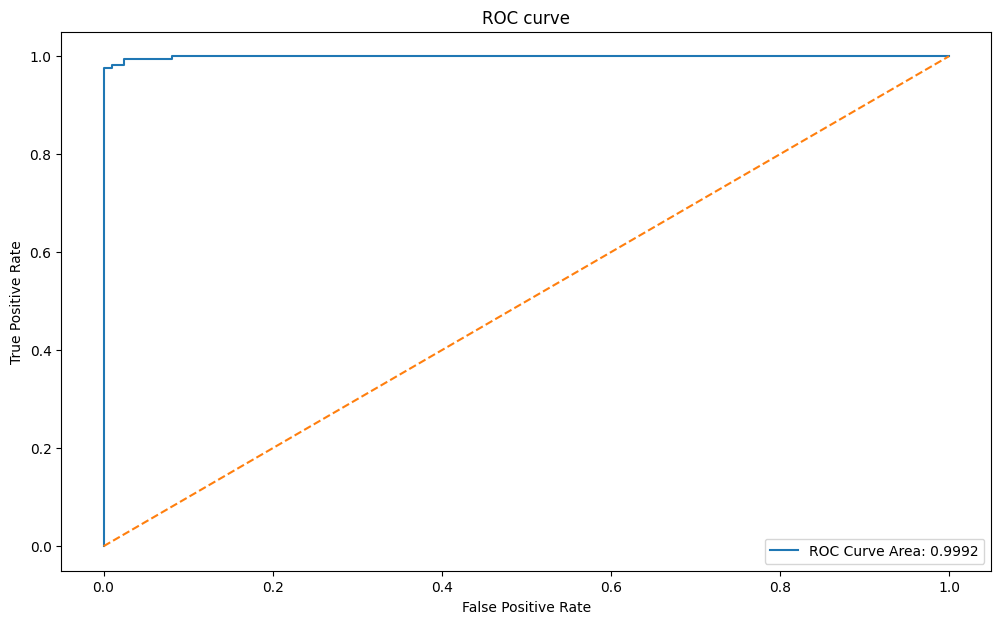

------------------------------------------------------------
Model Summary for Test Data
------------------------------------------------------------
Accuracy Score: 0.9469


Confusion Matrix is: 
[[69  2]
 [ 4 38]]




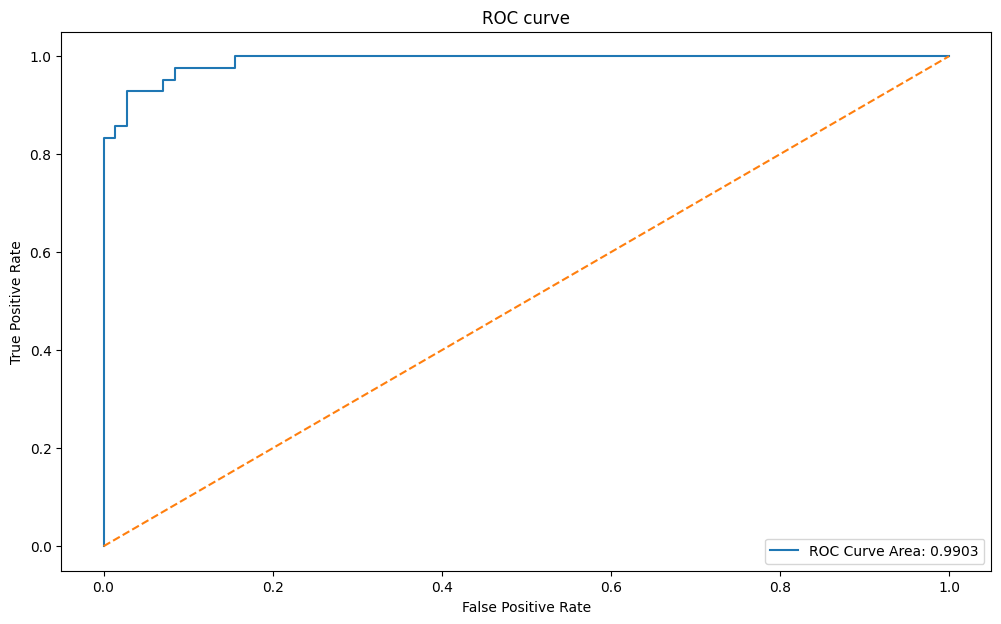

Final Simulation Averages: 

Train Average Accuracy: 0.9834795321637423
Train Precision Accuracy: 0.9835148007630192
Train Recall Accuracy: 0.9834795321637423
Train F1 Score Accuracy: 0.9834548196528143
Train AUC Accuracy: 0.9986
Test Average Accuracy: 0.9604719764011799
Test Precision Accuracy: 0.960904519303265
Test Recall Accuracy: 0.9604719764011799
Test F1 Score Accuracy: 0.960364067468556
Test AUC Accuracy: 0.9885466666666666


In [37]:
monte_carlo_svm(wdbc_df, 30)


#### (ii) Semi-Supervised Learning/ Self-training

##### (A)

##### (B)

In [38]:
def monte_carlo_semi_supervised_svm(data, iterations):
    kwargs = {
        'param_grid' : {'C' : np.logspace(-2, 7, 20)}, 
        'scoring' : 'f1_weighted',
        'n_jobs' : None,
        'verbose' : 0
    }
    
    k_folds = 5
    cols = ['acc', 'precision', 'recall', 'f1-score']
    train_df = pd.DataFrame(columns=cols)
    test_df = pd.DataFrame(columns=cols)
    
    for i in range(iterations):
        x_train, x_test, y_train, y_test = custom_train_test_split(wdbc_df, random_state=i)
        x_train = normalizer.fit_transform(x_train)
        x_test = normalizer.fit_transform(x_test)

        labeled_idx = []
        unlabeled_idx = []
        
        for c in [0, 1]:
            c_idx, = np.where(trainY == c)
            idx_num = round(len(c_idx) * 0.5)
            select_idx = np.random.choice(c_idx, idx_num, replace=False)
            labeled_idx.extend(select_idx)
        
        for i in range(len(x_train)):
            if i not in labeled_idx:
                unlabeled_idx.append(i)

        labeledX = x_train.iloc[labeled_idx].to_numpy().tolist()
        labeledY = y_train.iloc[labeled_idx].to_numpy().tolist()
        unlabeledX = x_train.iloc[unlabeled_idx].to_numpy().tolist()
        unlabeledY = y_train.iloc[unlabeled_idx].to_numpy().tolist()
        
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **kwargs)
        clf.fit(labeledX, labeledY)
        
        while len(unlabeledX) > 0:
            scores = clf.decision_function(unlabeledX)
            sorted_idx = sorted([i for i in range(len(unlabeledX))], 
                                key=lambda x : abs(scores[x]))
            unlabeledX = [unlabeledX[i] for i in sorted_idx]
            unlabeledY = [unlabeledY[i] for i in sorted_idx]
            
            labeledX.append(unlabeledX.pop())
            labeledY.append(unlabeledY.pop())
            clf.best_estimator_.fit(labeledX, labeledY)   

        print(f'\nITERATION: {i+1}')
        print(f'Best parameter setting: {clf.best_params_}\n')

        print(f'Train Data\n')   
        train_report, y_train_pred, y_train_pred_prob, train_auc = print_model_summary(clf, x_train, y_train)

        train_accuracy_list.append(train_report['accuracy'])
        train_precision_list.append(train_report['weighted avg']['precision'])
        train_recall_list.append(train_report['weighted avg']['recall'])
        train_f1score_list.append(train_report['weighted avg']['f1-score'])
        train_auc_list.append(train_auc)


        print(f'\nTest Data\n')   
        test_report, y_test_pred, y_test_pred_prob, test_auc =  print_model_summary(clf, x_test, y_test)
        test_accuracy_list.append(test_report['accuracy'])
        test_precision_list.append(test_report['weighted avg']['precision'])
        test_recall_list.append(test_report['weighted avg']['recall'])
        test_f1score_list.append(test_report['weighted avg']['f1-score'])
        test_auc_list.append(test_auc)
        

    print('-'*60)
    print(f"Model Summary for Train Data")
    print('-'*60)   

    calculate_model_summary(y_train, y_train_pred, y_train_pred_prob)
    print('-'*60)
    print(f"Model Summary for Test Data")
    print('-'*60) 

    calculate_model_summary(y_test, y_test_pred, y_test_pred_prob)

    print("Final Simulation Averages: \n")
    print("Train Average Accuracy: " + str(sum(train_accuracy_list)/len(train_accuracy_list)))
    print("Train Precision Accuracy: " + str(sum(train_precision_list)/len(train_precision_list)))
    print("Train Recall Accuracy: " + str(sum(train_recall_list)/len(train_recall_list)))
    print("Train F1 Score Accuracy: " + str(sum(train_f1score_list)/len(train_f1score_list)))
    print("Train AUC Accuracy: " + str(sum(train_auc_list)/len(train_auc_list)))

    print("Test Average Accuracy: " + str(sum(test_accuracy_list)/len(test_accuracy_list)))
    print("Test Precision Accuracy: " + str(sum(test_precision_list)/len(test_precision_list)))
    print("Test Recall Accuracy: " + str(sum(test_recall_list)/len(test_recall_list)))
    print("Test F1 Score Accuracy: " + str(sum(test_f1score_list)/len(test_f1score_list)))
    print("Test AUC Accuracy: " + str(sum(test_auc_list)/len(test_auc_list)))


ITERATION: 1
Best parameter setting: {'C': 127427.49857031321}

Train Data

	Accuracy: 0.9956140350877193
	Precision: 0.9956
	Recall: 0.9956
	F1 Score: 0.9956
	AUC: 0.9999

Test Data

	Accuracy: 0.9646017699115044
	Precision: 0.9649
	Recall: 0.9646
	F1 Score: 0.9644
	AUC: 0.9829

ITERATION: 2
Best parameter setting: {'C': 1623.776739188721}

Train Data

	Accuracy: 0.9758771929824561
	Precision: 0.9759
	Recall: 0.9759
	F1 Score: 0.9759
	AUC: 0.9964

Test Data

	Accuracy: 0.9557522123893806
	Precision: 0.9577
	Recall: 0.9558
	F1 Score: 0.956
	AUC: 0.9946

ITERATION: 3
Best parameter setting: {'C': 1623.776739188721}

Train Data

	Accuracy: 0.9758771929824561
	Precision: 0.9759
	Recall: 0.9759
	F1 Score: 0.9759
	AUC: 0.9974

Test Data

	Accuracy: 0.9203539823008849
	Precision: 0.9205
	Recall: 0.9204
	F1 Score: 0.9197
	AUC: 0.9869

ITERATION: 4
Best parameter setting: {'C': 14384.498882876629}

Train Data

	Accuracy: 0.9912280701754386
	Precision: 0.9913
	Recall: 0.9912
	F1 Score: 0.9912


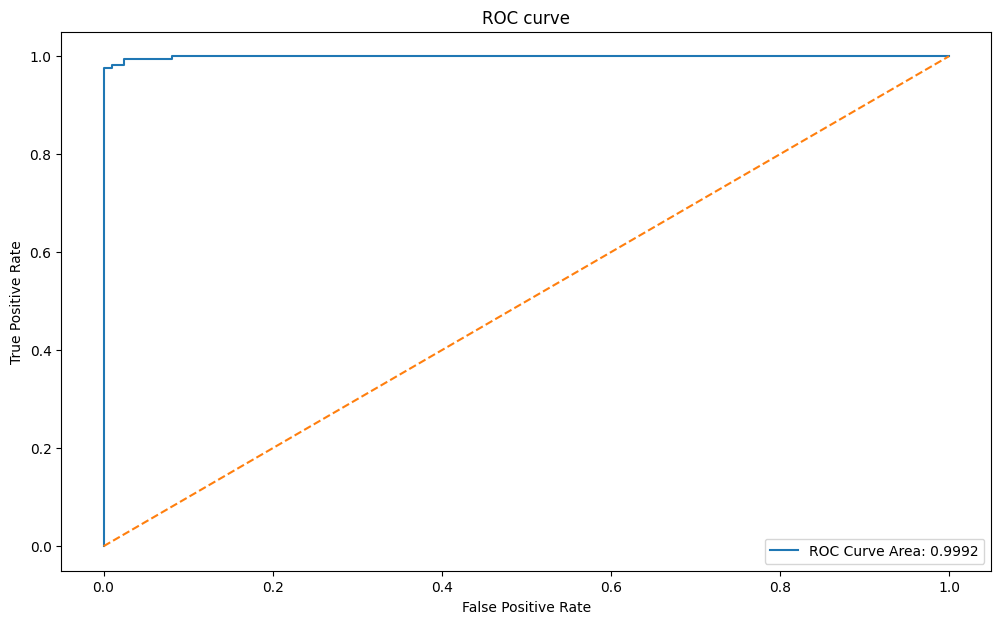

------------------------------------------------------------
Model Summary for Test Data
------------------------------------------------------------
Accuracy Score: 0.9469


Confusion Matrix is: 
[[69  2]
 [ 4 38]]




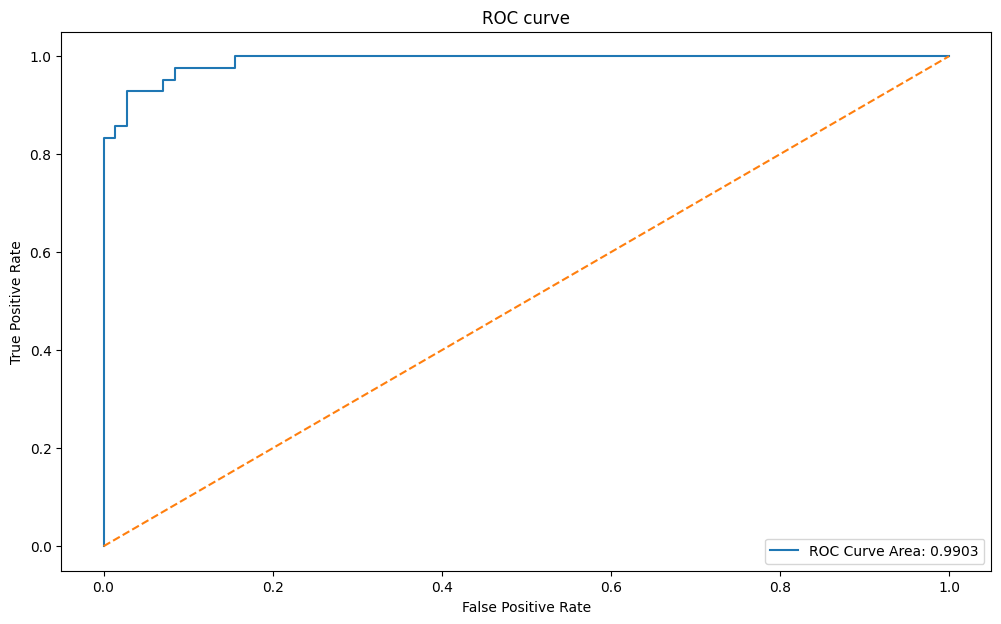

Final Simulation Averages: 

Train Average Accuracy: 0.9834795321637431
Train Precision Accuracy: 0.9835148007630192
Train Recall Accuracy: 0.9834795321637431
Train F1 Score Accuracy: 0.9834548196528146
Train AUC Accuracy: 0.9985999999999996
Test Average Accuracy: 0.96047197640118
Test Precision Accuracy: 0.9609045193032648
Test Recall Accuracy: 0.96047197640118
Test F1 Score Accuracy: 0.9603640674685557
Test AUC Accuracy: 0.9885466666666667


In [39]:
monte_carlo_svm(wdbc_df, 30)


#### (iii) Unsupervised Learning

##### (A) 
How do you make sure that the algorithm was not trapped in a local minimum?

1. By running Kmeans algorithm multiple times (using n_init parameter) and take the best solution out of them 
2. By running Kmeans with different initilization - Random initialization or Kmeans++

##### (B)

In [40]:
def print_and_get_metrics_kmeans(predictions, x, y):
    auc_y = y.copy()
    auc_y["diagnosis"] = np.where(y["diagnosis"] == "B", 0, 1)
    auc_y_pred = predictions.copy()
    auc_y_pred["cluster_diagnosis"] = np.where(predictions["cluster_diagnosis"] == "B", 0, 1)
    auc_score = metrics.roc_auc_score(auc_y["diagnosis"], auc_y_pred["cluster_diagnosis"])
    print("AUC: " + str(auc_score))
    print("CLASSIFICATION REPORT")
    print(classification_report(y["diagnosis"], predictions["cluster_diagnosis"]))
    report = classification_report(y["diagnosis"], predictions["cluster_diagnosis"], output_dict = True)
    precision = report["macro avg"]["precision"]
    recall = report["macro avg"]["recall"]
    f1 = report["macro avg"]["f1-score"]
    accuracy = report["accuracy"]
    return accuracy, precision, recall, f1, auc_score

def roc_confmatrix_metrics_kmeans(kmeans_clf, predictions, x, y, positive_class):
    print("CONFUSION MATRIX")
    conf = metrics.confusion_matrix(y["diagnosis"].values.ravel(), predictions["cluster_diagnosis"])
    print(conf)
    cluster_centers = kmeans_clf.cluster_centers_
    distances = kmeans_clf.transform(x)
    distances = distances[:, positive_class]
    distances = distances.apply(lambda x: x*-1) 
    print(distances)
    scores = softmax(distances)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y, scores, pos_label="M")
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

In [41]:
from scipy.special import softmax


def get_distance(centers, X, cluster_label):
    dist = np.ndarray((X.shape[0],))
    proba = np.ndarray((X.shape[0], 2))
    for i, x in enumerate(X):
        center = centers[cluster_label[i]]
        dist[i] = np.linalg.norm(x - center)
        proba[i, 0] = np.linalg.norm(x - centers[0])
        proba[i, 1] = np.linalg.norm(x - centers[1])
    
    proba = softmax(proba, axis=1).astype(np.float64)
    return dist, proba

def get_majority(X, cluster_label, dist, Y):
    label2cluster = np.ndarray((2,), dtype='int')
    major_label = cluster_label.copy()
    for cluster in [0, 1]:
        sample_idx, = np.where(cluster_label == cluster)
        top30 = sorted(sample_idx.tolist(), key=lambda i : dist[i])[:30]
        majority = Y.iloc[top30].value_counts().index[0]
        major_label[sample_idx] = majority
        label2cluster[majority] = cluster
    return label2cluster, major_label

In [42]:
def monte_carlo_kmeans(data, iterations):

    kwargs = {
        'param_grid' : {'C' : np.logspace(-2, 7, 20)}, 
        'scoring' : 'f1_weighted',
        'n_jobs' : None,
        'verbose' : 0
    }
    
    k_folds = 5
    cols = ['acc', 'precision', 'recall', 'f1-score']
    train_df = pd.DataFrame(columns=cols)
    test_df = pd.DataFrame(columns=cols)
    
    for i in range(iterations):
        x_train, x_test, y_train, y_test = custom_train_test_split(wdbc_df, random_state=i)
        x_train = normalizer.fit_transform(x_train)
        x_test = normalizer.fit_transform(x_test)


        clusterer = KMeans(n_clusters=2, n_init = 15, random_state=i).fit(x_train)
        train_cluster_label = clusterer.predict(x_train)
        dist, trainPredY_prob = get_distance(clusterer.cluster_centers_, x_train, train_cluster_label)
        label2cluster, trainPredY = get_majority(x_train, train_cluster_label, dist, y_train)


        pos_cluster = label2cluster[0]
        trainPredY_prob = trainPredY_prob[:, pos_cluster]
        train_report = classification_report(y_train, trainPredY, output_dict=True)
        acc = train_report['accuracy']
        fpr, tpr, thresholds = roc_curve(y_train, trainPredY_prob, pos_label=1)
        train_auc = round(auc(fpr, tpr), 4)
        

        test_cluster_label = clusterer.predict(x_test)
        dist, testPredY_prob = get_distance(clusterer.cluster_centers_, x_test, test_cluster_label)

        label2cluster, testPredY = get_majority(x_test, test_cluster_label, dist, y_test)
        pos_cluster = label2cluster[0]
        testPredY_prob = testPredY_prob[:, pos_cluster]
        test_report = classification_report(y_test, testPredY, output_dict=True)
        acc = test_report['accuracy']
        fpr, tpr, thresholds = roc_curve(y_test, testPredY_prob, pos_label=1)
        test_auc = round(auc(fpr, tpr), 4)

        print(f'\nITERATION: {i+1}')

        print(f'Train Data\n')   
        print(f'\tAccuracy:', train_report['accuracy'])
        print(f'\tPrecision:', round(train_report['weighted avg']['precision'],4))
        print(f'\tRecall:', round(train_report['weighted avg']['recall'],4))
        print(f'\tF1 Score:', round(train_report['weighted avg']['f1-score'],4))
        print(f'\tAUC:', train_auc)

        train_accuracy_list.append(train_report['accuracy'])
        train_precision_list.append(train_report['weighted avg']['precision'])
        train_recall_list.append(train_report['weighted avg']['recall'])
        train_f1score_list.append(train_report['weighted avg']['f1-score'])
        train_auc_list.append(train_auc)


        print(f'\nTest Data\n')   
        print(f'\tAccuracy:', test_report['accuracy'])
        print(f'\tPrecision:', round(test_report['weighted avg']['precision'],4))
        print(f'\tRecall:', round(test_report['weighted avg']['recall'],4))
        print(f'\tF1 Score:', round(test_report['weighted avg']['f1-score'],4))
        print(f'\tAUC:', test_auc)

        test_accuracy_list.append(test_report['accuracy'])
        test_precision_list.append(test_report['weighted avg']['precision'])
        test_recall_list.append(test_report['weighted avg']['recall'])
        test_f1score_list.append(test_report['weighted avg']['f1-score'])
        test_auc_list.append(test_auc)
        

    print('-'*60)
    print(f"Model Summary for Train Data")
    print('-'*60)   

    calculate_model_summary(y_train, trainPredY, trainPredY_prob)
    print('-'*60)
    print(f"Model Summary for Test Data")
    print('-'*60) 

    calculate_model_summary(y_test, testPredY, testPredY_prob)

    print("Final Simulation Averages: \n")
    print("Train Average Accuracy: " + str(sum(train_accuracy_list)/len(train_accuracy_list)))
    print("Train Precision Accuracy: " + str(sum(train_precision_list)/len(train_precision_list)))
    print("Train Recall Accuracy: " + str(sum(train_recall_list)/len(train_recall_list)))
    print("Train F1 Score Accuracy: " + str(sum(train_f1score_list)/len(train_f1score_list)))
    print("Train AUC Accuracy: " + str(sum(train_auc_list)/len(train_auc_list)))

    print("Test Average Accuracy: " + str(sum(test_accuracy_list)/len(test_accuracy_list)))
    print("Test Precision Accuracy: " + str(sum(test_precision_list)/len(test_precision_list)))
    print("Test Recall Accuracy: " + str(sum(test_recall_list)/len(test_recall_list)))
    print("Test F1 Score Accuracy: " + str(sum(test_f1score_list)/len(test_f1score_list)))
    print("Test AUC Accuracy: " + str(sum(test_auc_list)/len(test_auc_list)))
        
    
    


ITERATION: 1
Train Data

	Accuracy: 0.8881578947368421
	Precision: 0.8949
	Recall: 0.8882
	F1 Score: 0.8847
	AUC: 0.9533

Test Data

	Accuracy: 0.8761061946902655
	Precision: 0.8965
	Recall: 0.8761
	F1 Score: 0.8693
	AUC: 0.9262

ITERATION: 2
Train Data

	Accuracy: 0.8728070175438597
	Precision: 0.8824
	Recall: 0.8728
	F1 Score: 0.8679
	AUC: 0.9395

Test Data

	Accuracy: 0.9557522123893806
	Precision: 0.9587
	Recall: 0.9558
	F1 Score: 0.9551
	AUC: 0.9799

ITERATION: 3
Train Data

	Accuracy: 0.8969298245614035
	Precision: 0.9056
	Recall: 0.8969
	F1 Score: 0.8935
	AUC: 0.9598

Test Data

	Accuracy: 0.8495575221238938
	Precision: 0.8622
	Recall: 0.8496
	F1 Score: 0.8421
	AUC: 0.9078

ITERATION: 4
Train Data

	Accuracy: 0.8859649122807017
	Precision: 0.8943
	Recall: 0.886
	F1 Score: 0.8821
	AUC: 0.9543

Test Data

	Accuracy: 0.911504424778761
	Precision: 0.9175
	Recall: 0.9115
	F1 Score: 0.9092
	AUC: 0.937

ITERATION: 5
Train Data

	Accuracy: 0.8991228070175439
	Precision: 0.9025
	Recall:

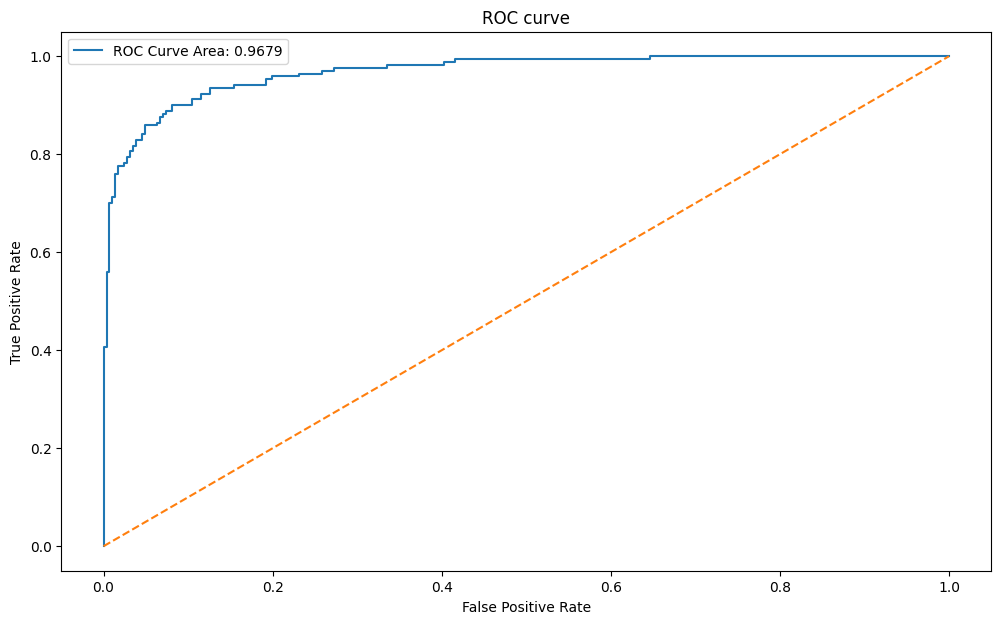

------------------------------------------------------------
Model Summary for Test Data
------------------------------------------------------------
Accuracy Score: 0.8407


Confusion Matrix is: 
[[70  1]
 [17 25]]




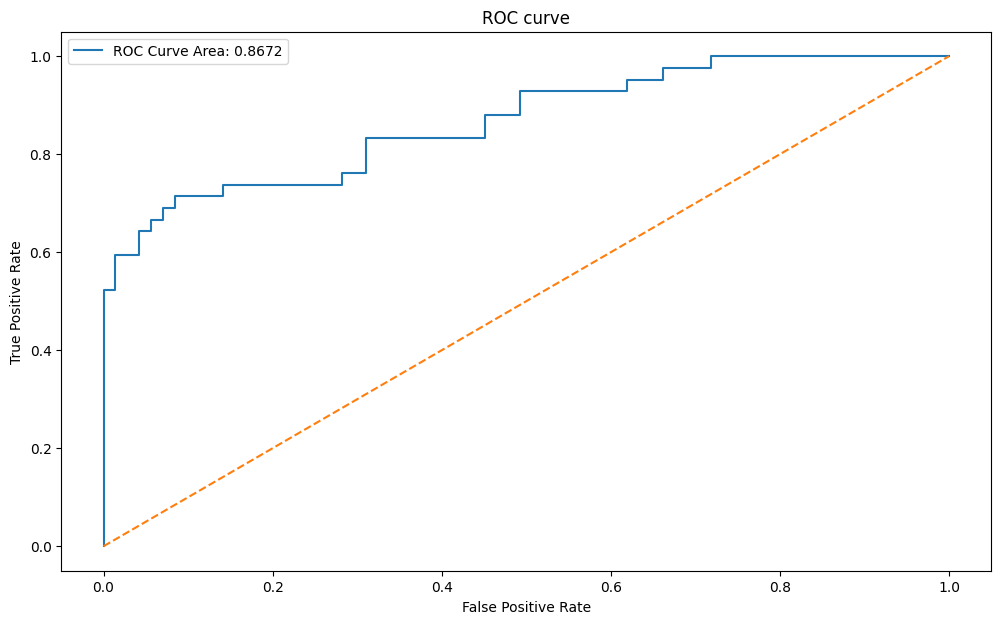

Final Simulation Averages: 

Train Average Accuracy: 0.9516569200779724
Train Precision Accuracy: 0.9546430755461863
Train Recall Accuracy: 0.9516569200779724
Train F1 Score Accuracy: 0.9503419240651123
Train AUC Accuracy: 0.9826455555555557
Test Average Accuracy: 0.9344149459193709
Test Precision Accuracy: 0.9386490328533422
Test Recall Accuracy: 0.9344149459193709
Test F1 Score Accuracy: 0.9326237067789007
Test AUC Accuracy: 0.9743377777777779


In [43]:
monte_carlo_kmeans(wdbc_df, 30)

#### (iv) Spectral Clustering

In [44]:
def monte_carlo_sc(data, iterations):

    kwargs = {
        'param_grid' : {'C' : np.logspace(-2, 7, 20)}, 
        'scoring' : 'f1_weighted',
        'n_jobs' : None,
        'verbose' : 0
    }
    
    k_folds = 5
    cols = ['acc', 'precision', 'recall', 'f1-score']
    train_df = pd.DataFrame(columns=cols)
    test_df = pd.DataFrame(columns=cols)
    
    for i in range(iterations):
        x_train, x_test, y_train, y_test = custom_train_test_split(wdbc_df, random_state=i)
        x_train = normalizer.fit_transform(x_train)
        x_test = normalizer.fit_transform(x_test)


        cluster_label = SpectralClustering(n_clusters=2, 
                                               assign_labels='kmeans', 
                                               affinity='rbf', 
                                               eigen_tol = 1e-2, 
                                               eigen_solver = 'arpack', 
                                               random_state=0).fit_predict(x_train)
        cluster_centers = []
        for clus in [0,1]:
            cluster_centers.append(np.mean(x_train[cluster_label==clus], axis = 0).tolist())

        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(x_train, cluster_label)
        
        train_cluster_label = knn.predict(x_train)
        dist, trainPredY_prob = get_distance(cluster_centers, x_train, train_cluster_label)
        label2cluster, trainPredY = get_majority(x_train, train_cluster_label, dist, y_train)

        pos_cluster = label2cluster[0]
        trainPredY_prob = trainPredY_prob[:, pos_cluster]
        train_report = classification_report(y_train, trainPredY, output_dict=True)
        acc = train_report['accuracy']
        fpr, tpr, thresholds = roc_curve(y_train, trainPredY_prob, pos_label=1)
        train_auc = round(auc(fpr, tpr), 4)
        

        test_cluster_label = knn.predict(x_test)
        dist, testPredY_prob = get_distance(cluster_centers, x_test, test_cluster_label)

        label2cluster, testPredY = get_majority(x_test, test_cluster_label, dist, y_test)
        pos_cluster = label2cluster[0]
        testPredY_prob = testPredY_prob[:, pos_cluster]
        test_report = classification_report(y_test, testPredY, output_dict=True)
        acc = test_report['accuracy']
        fpr, tpr, thresholds = roc_curve(y_test, testPredY_prob, pos_label=1)
        test_auc = round(auc(fpr, tpr), 4)

        print(f'\nITERATION: {i+1}')

        print(f'Train Data\n')   
        #train_report, y_train_pred, y_train_pred_prob, train_auc = print_model_summary(None, testPredY, testPredY_prob, pred = 'NO')
        print(f'\tAccuracy:', train_report['accuracy'])
        print(f'\tPrecision:', round(train_report['weighted avg']['precision'],4))
        print(f'\tRecall:', round(train_report['weighted avg']['recall'],4))
        print(f'\tF1 Score:', round(train_report['weighted avg']['f1-score'],4))
        print(f'\tAUC:', train_auc)

        train_accuracy_list.append(train_report['accuracy'])
        train_precision_list.append(train_report['weighted avg']['precision'])
        train_recall_list.append(train_report['weighted avg']['recall'])
        train_f1score_list.append(train_report['weighted avg']['f1-score'])
        train_auc_list.append(train_auc)


        print(f'\nTest Data\n')   
        #test_report, y_test_pred, y_test_pred_prob, test_auc =  print_model_summary(None, testPredY, testPredY_prob, pred = 'NO')
        print(f'\tAccuracy:', test_report['accuracy'])
        print(f'\tPrecision:', round(test_report['weighted avg']['precision'],4))
        print(f'\tRecall:', round(test_report['weighted avg']['recall'],4))
        print(f'\tF1 Score:', round(test_report['weighted avg']['f1-score'],4))
        print(f'\tAUC:', test_auc)

        test_accuracy_list.append(test_report['accuracy'])
        test_precision_list.append(test_report['weighted avg']['precision'])
        test_recall_list.append(test_report['weighted avg']['recall'])
        test_f1score_list.append(test_report['weighted avg']['f1-score'])
        test_auc_list.append(test_auc)
        

    print('-'*60)
    print(f"Model Summary for Train Data")
    print('-'*60)   

    calculate_model_summary(y_train, trainPredY, trainPredY_prob)
    print('-'*60)
    print(f"Model Summary for Test Data")
    print('-'*60) 

    calculate_model_summary(y_test, testPredY, testPredY_prob)

    print("Final Simulation Averages: \n")
    print("Train Average Accuracy: " + str(sum(train_accuracy_list)/len(train_accuracy_list)))
    print("Train Precision Accuracy: " + str(sum(train_precision_list)/len(train_precision_list)))
    print("Train Recall Accuracy: " + str(sum(train_recall_list)/len(train_recall_list)))
    print("Train F1 Score Accuracy: " + str(sum(train_f1score_list)/len(train_f1score_list)))
    print("Train AUC Accuracy: " + str(sum(train_auc_list)/len(train_auc_list)))

    print("Test Average Accuracy: " + str(sum(test_accuracy_list)/len(test_accuracy_list)))
    print("Test Precision Accuracy: " + str(sum(test_precision_list)/len(test_precision_list)))
    print("Test Recall Accuracy: " + str(sum(test_recall_list)/len(test_recall_list)))
    print("Test F1 Score Accuracy: " + str(sum(test_f1score_list)/len(test_f1score_list)))
    print("Test AUC Accuracy: " + str(sum(test_auc_list)/len(test_auc_list)))
        
    
    


ITERATION: 1
Train Data

	Accuracy: 0.8859649122807017
	Precision: 0.8943
	Recall: 0.886
	F1 Score: 0.8821
	AUC: 0.9527

Test Data

	Accuracy: 0.8849557522123894
	Precision: 0.9028
	Recall: 0.885
	F1 Score: 0.8792
	AUC: 0.9252

ITERATION: 2
Train Data

	Accuracy: 0.868421052631579
	Precision: 0.8775
	Recall: 0.8684
	F1 Score: 0.8633
	AUC: 0.9391

Test Data

	Accuracy: 0.9203539823008849
	Precision: 0.9249
	Recall: 0.9204
	F1 Score: 0.9186
	AUC: 0.9795

ITERATION: 3
Train Data

	Accuracy: 0.8925438596491229
	Precision: 0.9021
	Recall: 0.8925
	F1 Score: 0.8888
	AUC: 0.9592

Test Data

	Accuracy: 0.8407079646017699
	Precision: 0.8493
	Recall: 0.8407
	F1 Score: 0.8336
	AUC: 0.9064

ITERATION: 4
Train Data

	Accuracy: 0.8793859649122807
	Precision: 0.889
	Recall: 0.8794
	F1 Score: 0.8749
	AUC: 0.9536

Test Data

	Accuracy: 0.8761061946902655
	Precision: 0.8771
	Recall: 0.8761
	F1 Score: 0.8739
	AUC: 0.9359

ITERATION: 5
Train Data

	Accuracy: 0.8837719298245614
	Precision: 0.8913
	Recall: 

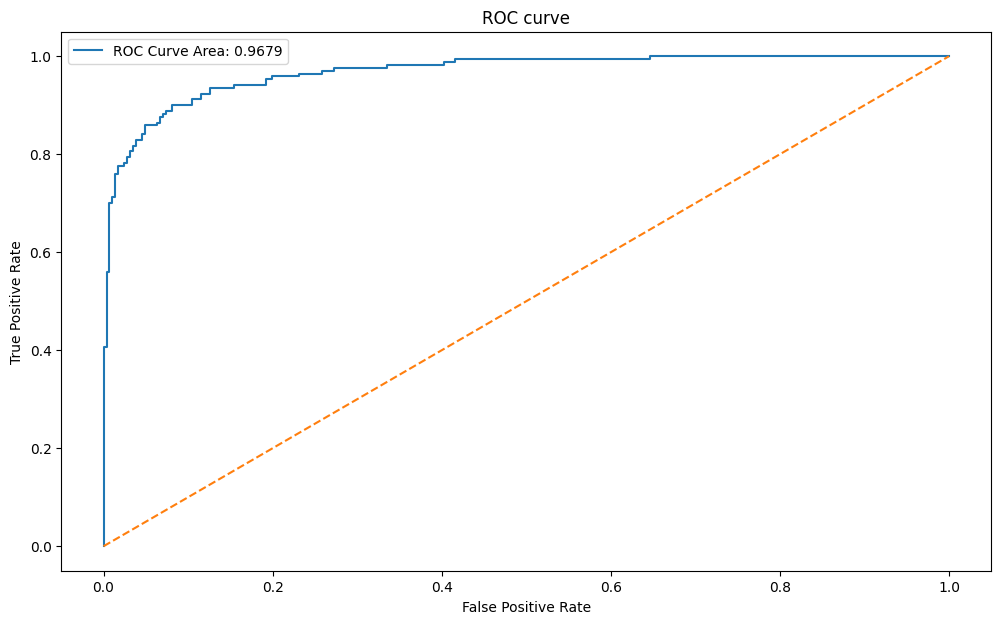

------------------------------------------------------------
Model Summary for Test Data
------------------------------------------------------------
Accuracy Score: 0.823


Confusion Matrix is: 
[[69  2]
 [18 24]]




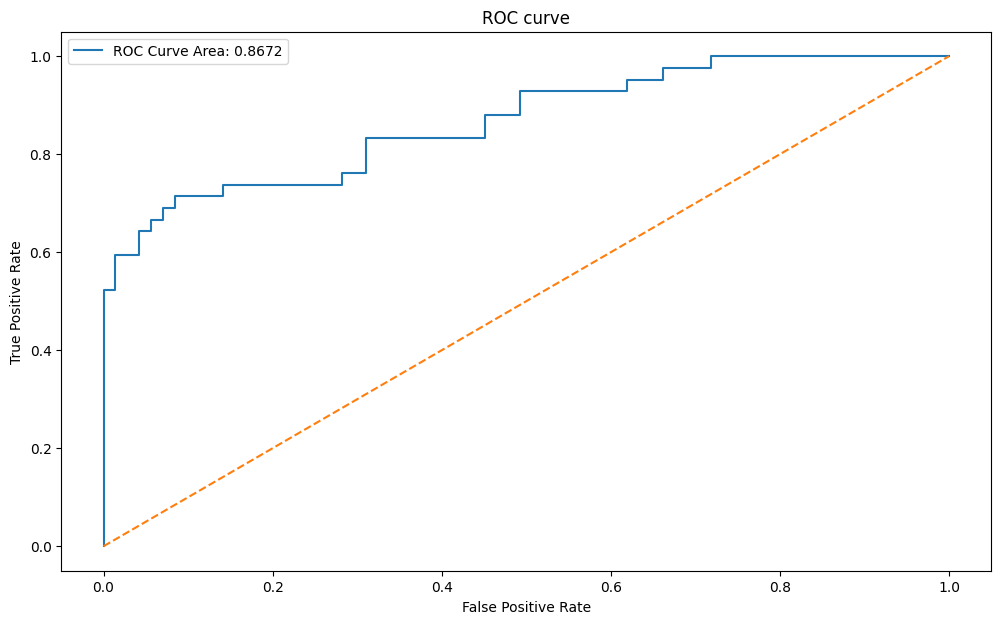

Final Simulation Averages: 

Train Average Accuracy: 0.9344663742690053
Train Precision Accuracy: 0.939233155068249
Train Recall Accuracy: 0.9344663742690053
Train F1 Score Accuracy: 0.932372379230614
Train AUC Accuracy: 0.9745208333333332
Test Average Accuracy: 0.9187315634218292
Test Precision Accuracy: 0.925263235784134
Test Recall Accuracy: 0.9187315634218292
Test F1 Score Accuracy: 0.9158119273292855
Test AUC Accuracy: 0.9670675000000004


In [45]:
monte_carlo_sc(wdbc_df, 30)

#### (iv) Compare

Supervized L1 SVM:

Train Average Accuracy: 0.9834795321637423 
Train Precision Accuracy: 0.9835148007630192
Train Recall Accuracy: 0.9834795321637423
Train F1 Score Accuracy: 0.9834548196528143
Train AUC Accuracy: 0.9986
Test Average Accuracy: 0.9604719764011799 
Test Precision Accuracy: 0.960904519303265
Test Recall Accuracy: 0.9604719764011799
Test F1 Score Accuracy: 0.960364067468556
Test AUC Accuracy: 0.9885466666666666


Semi-Supervized L1 SVM:

Train Average Accuracy: 0.9834795321637431
Train Precision Accuracy: 0.9835148007630192
Train Recall Accuracy: 0.9834795321637431
Train F1 Score Accuracy: 0.9834548196528146
Train AUC Accuracy: 0.9985999999999996
Test Average Accuracy: 0.96047197640118
Test Precision Accuracy: 0.9609045193032648
Test Recall Accuracy: 0.96047197640118
Test F1 Score Accuracy: 0.9603640674685557
Test AUC Accuracy: 0.9885466666666667

Unsupervised KMeans:

Train Average Accuracy: 0.888011695906433
Train Precision Accuracy: 0.8968996251125209
Train Recall Accuracy: 0.888011695906433
Train F1 Score Accuracy: 0.8841161328897077
Train AUC Accuracy: 0.9507366666666667
Test Average Accuracy: 0.8823008849557521
Test Precision Accuracy: 0.8941380599534968
Test Recall Accuracy: 0.8823008849557521
Test F1 Score Accuracy: 0.8771429853995893
Test AUC Accuracy: 0.9459199999999999

Unsupervised-Spectral:

Train Average Accuracy: 0.8854532163742689
Train Precision Accuracy: 0.8949515093734796
Train Recall Accuracy: 0.8854532163742689
Train F1 Score Accuracy: 0.8812899388084136
Train AUC Accuracy: 0.9504416666666667
Test Average Accuracy: 0.876991150442478
Test Precision Accuracy: 0.8896219522650036
Test Recall Accuracy: 0.876991150442478
Test F1 Score Accuracy: 0.8712597871900134
Test AUC Accuracy: 0.9455883333333334


As expected, Supervised and Semi-Supervised perform way better than Unsupervised learning.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [46]:
data = pd.read_csv("../data/data_banknote_authentication.txt", header=None)
data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
data

class
0    762
1    610
Name: count, dtype: int64

In [47]:
def random_split(data):    
    train_dp = 900
    test_dp = 472

    test_idx = np.random.choice(data.shape[0], test_dp, replace=False)

    temp_list = []
    for i in range(data.shape[0]):
        if i not in test_idx:
            temp_list.append(i);

    train_idx = np.array(temp_list)
    return {
        'train_idx': train_idx,
        'test_idx': test_idx,
    }

In [48]:
index = random_split(data)
train_df = data.iloc[index['train_idx']]
test_df = data.iloc[index['test_idx']]

train_df

,variance,skewness,curtosis,entropy,class
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
5,4.36840,9.67180,-3.9606,-3.16250,0
7,2.09220,-6.81000,8.4636,-0.60216,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [49]:
test_df

,variance,skewness,curtosis,entropy,class
989,-6.75260,8.81720,-0.061983,-3.72500,1
765,-3.84830,-12.80470,15.682400,-1.28100,1
1036,-2.38980,-0.78427,3.014100,0.76205,1
268,0.92970,-3.79710,4.642900,-0.29570,0
1106,-0.12690,-1.15050,-0.951380,0.57843,1
...,...,...,...,...,...
1360,-0.24745,1.93680,-2.469700,-0.80518,1
274,5.27560,0.13863,0.121380,1.14350,0
509,-0.29510,9.04890,-0.527250,-2.07890,0
930,-2.22140,-0.23798,0.560080,0.05602,1


### (b) Repeat each of the following two procedures 50 times

In [50]:
def passive_learning(trainX, trainY, testX, testY, settings):
    i = np.arange(trainX.shape[0])
    
    idx = []
    accuracy_list = []
    
    while len(i) > 0:
        np.random.shuffle(i)
        pool, i = i[:10], i[10:]
        idx.extend(pool)
        
        used_trainX, used_trainY = trainX.iloc[idx], trainY.iloc[idx]
        
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
        clf.fit(used_trainX, used_trainY)
        
        testPredY = clf.predict(testX)
        test_report = classification_report(testY, testPredY, output_dict=True)
        accuracy_list.append(test_report['accuracy'])
    
    return accuracy_list

def active_learning(trainX, trainY, testX, testY, settings):
    i = np.arange(trainX.shape[0])
    idx = []
    accuracy_list = []
    
    np.random.shuffle(i)
    pool, i = i[:10], i[10:]
    idx.extend(pool)
    
    while len(idx) <= 900:
        used_trainX, used_trainY = trainX.iloc[idx], trainY.iloc[idx]
        
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
        clf.fit(used_trainX, used_trainY)
        
        testPredY = clf.predict(testX)
        testReport = classification_report(testY, testPredY, output_dict=True)
        accuracy_list.append(testReport['accuracy'])
        
        if len(i) == 0:
            break
        
        dist = clf.decision_function(trainX.iloc[i])
        sortedarg = np.arange(len(i))
        sorted(sortedarg, key=lambda i : abs(dist[i]))
        i = i[sortedarg]
        pool, i = i[:10], i[10:]
        idx.extend(pool)
        
    return accuracy_list



#### (i) Passive

In [51]:
normalizer = Normalizer()
def monte_carlo_passive_learning(data, n):
    
    kwargs = {
        'param_grid' : {'C' : np.logspace(-2, 7, 20)},
        'scoring' : 'f1_weighted',
        'n_jobs' : None,
        'verbose' : 0
    }
    
    learning_curve = []
    
    for i in range(n):
        
        index = random_split(data)
        train_idx = index['train_idx']
        test_idx = index['test_idx']
        
        train_set, test_set = data.iloc[train_idx], data.iloc[test_idx]
        trainX, trainY = train_set.iloc[:, :-1], train_set.iloc[:, -1]
        testX, testY = test_set.iloc[:, :-1], test_set.iloc[:, -1]
        trainX = pd.DataFrame(normalizer.fit_transform(trainX))
        testX = pd.DataFrame(normalizer.fit_transform(testX))
        kwargs['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)

        acc_list = passive_learning(trainX, trainY, testX, testY, kwargs)
        learning_curve.append(acc_list)

        print(f'Iteration {i + 1}')
        print(f'Test accuracy: {round(acc_list[0], 4)}')
        print(f'Test accuracy: {round(acc_list[-1], 4)}')
    
    learning_curve = np.array(learning_curve)
    learning_curve = np.mean(learning_curve, axis=0)
    return learning_curve

In [56]:
passive_curve = monte_carlo_passive_learning(data,50)

Iteration 1
Test accuracy: 0.5763
Test accuracy: 0.9809
Iteration 2
Test accuracy: 0.9364
Test accuracy: 0.9894
Iteration 3
Test accuracy: 0.8792
Test accuracy: 0.9873
Iteration 4
Test accuracy: 0.8453
Test accuracy: 0.9979
Iteration 5
Test accuracy: 0.8114
Test accuracy: 0.9979
Iteration 6
Test accuracy: 0.9725
Test accuracy: 0.9873
Iteration 7
Test accuracy: 0.8432
Test accuracy: 0.9894
Iteration 8
Test accuracy: 0.8835
Test accuracy: 0.9894
Iteration 9
Test accuracy: 0.9873
Test accuracy: 0.9873
Iteration 10
Test accuracy: 0.8008
Test accuracy: 0.9873
Iteration 11
Test accuracy: 0.8581
Test accuracy: 0.9958
Iteration 12
Test accuracy: 0.9555
Test accuracy: 0.9915
Iteration 13
Test accuracy: 0.8665
Test accuracy: 0.9979
Iteration 14
Test accuracy: 0.8453
Test accuracy: 0.9936
Iteration 15
Test accuracy: 0.8008
Test accuracy: 1.0
Iteration 16
Test accuracy: 0.5593
Test accuracy: 0.9894
Iteration 17
Test accuracy: 0.8644
Test accuracy: 0.9915
Iteration 18
Test accuracy: 0.9661
Test acc

#### (ii) Active

In [53]:
def monte_carlo_active_learning(data, n):
    
    kwargs = {
        'param_grid' : {'C' : np.logspace(-2, 7, 20)},
        'scoring' : 'f1_weighted',
        'n_jobs' : None,
        'verbose' : 0
    }
    
    learning_curve = []
    
    for i in range(n):
        
        index = random_split(data)
        train_idx = index['train_idx']
        test_idx = index['test_idx']
        
        train_set, test_set = data.iloc[train_idx], data.iloc[test_idx]
        trainX, trainY = train_set.iloc[:, :-1], train_set.iloc[:, -1]
        testX, testY = test_set.iloc[:, :-1], test_set.iloc[:, -1]
        trainX = pd.DataFrame(normalizer.fit_transform(trainX))
        testX = pd.DataFrame(normalizer.fit_transform(testX))
        kwargs['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)

        acc_list = active_learning(trainX, trainY, testX, testY, kwargs)
        learning_curve.append(acc_list)

        print(f'Iteration {i + 1}')
        print(f'Test accuracy: {round(acc_list[0], 4)}')
        print(f'Test accuracy: {round(acc_list[-1], 4)}')
    
    learning_curve = np.array(learning_curve)
    learning_curve = np.mean(learning_curve, axis=0)
    return learning_curve

In [54]:
active_curve = monte_carlo_active_learning(data,50)

Iteration 1
Test accuracy: 0.9831
Test accuracy: 0.9936
Iteration 2
Test accuracy: 0.7966
Test accuracy: 0.9915
Iteration 3
Test accuracy: 0.8665
Test accuracy: 0.9958
Iteration 4
Test accuracy: 0.8581
Test accuracy: 0.9936
Iteration 5
Test accuracy: 0.8814
Test accuracy: 0.9936
Iteration 6
Test accuracy: 0.8136
Test accuracy: 0.9979
Iteration 7
Test accuracy: 0.9809
Test accuracy: 0.9915
Iteration 8
Test accuracy: 0.8432
Test accuracy: 0.9936
Iteration 9
Test accuracy: 0.9703
Test accuracy: 0.9936
Iteration 10
Test accuracy: 0.8242
Test accuracy: 0.9894
Iteration 11
Test accuracy: 0.8686
Test accuracy: 1.0
Iteration 12
Test accuracy: 0.5487
Test accuracy: 0.9958
Iteration 13
Test accuracy: 0.8411
Test accuracy: 0.9915
Iteration 14
Test accuracy: 0.875
Test accuracy: 0.9958
Iteration 15
Test accuracy: 0.9301
Test accuracy: 0.9936
Iteration 16
Test accuracy: 0.9089
Test accuracy: 0.9915
Iteration 17
Test accuracy: 0.5445
Test accuracy: 0.9936
Iteration 18
Test accuracy: 0.8983
Test accu

### (c) Average the 50 test errors

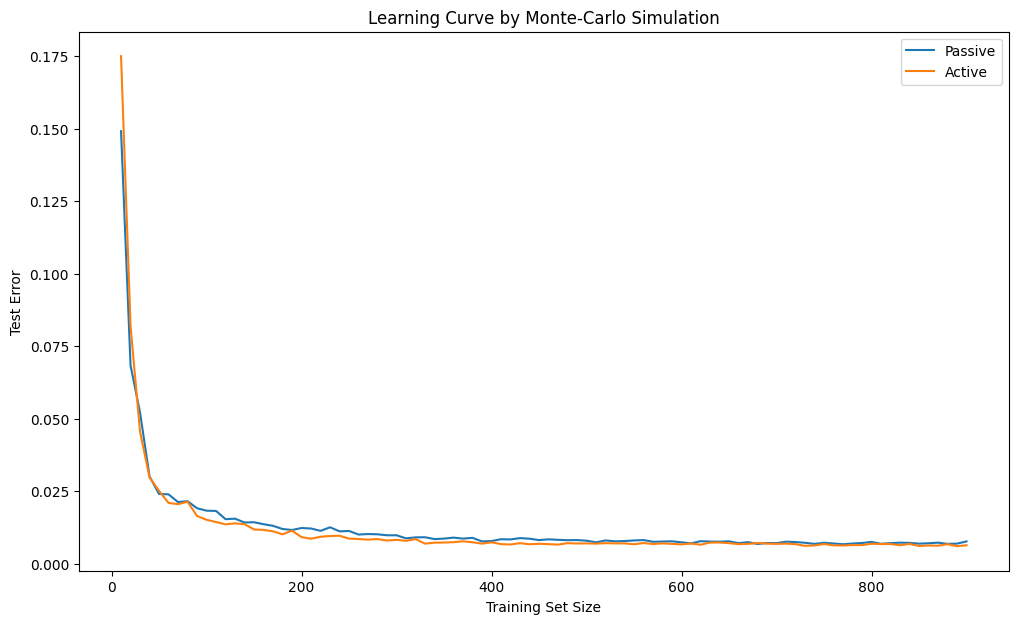

In [57]:
fig, axes = plt.subplots(figsize=(12, 7))
axes.set_title(f"Learning Curve by Monte-Carlo Simulation")
x = 10 * np.arange(1, 91)
axes.plot(x, 1 - passive_curve, label='Passive')
axes.plot(x, 1 - active_curve, label='Active')
axes.set_xlabel("Training Set Size")
axes.set_ylabel("Test Error")
axes.legend()
plt.show()

passive and active learning have performed equally well